In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


<a id="Overview the Data Set"></a> <br>
# Overview the Data Set
* We will use "sign language digits data set" for this tutorial.
* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity. 
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much. 
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

(-0.5, 63.5, 63.5, -0.5)

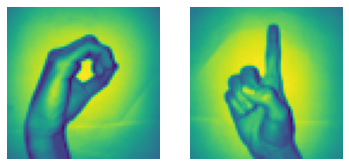

In [2]:
# load data set
x_l = np.load('./X.npy')
Y_l = np.load('./Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

* In order to create image array, I concatenate zero sign and one sign arrays
* Then I create label array 0 for zero sign images and 1 for one sign images.

In [3]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 
* Lets split X and Y into train and test sets.
    * test_size = percentage of test size. test = 15% and train = 75%
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [4]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

<font color='purple'>
What we did up to this point:
* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

In [5]:
# conv model
model = keras.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(1, activation='sigmoid'))


In [6]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

In [7]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10


2022-09-16 15:39:37.130075: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 1s 81ms/step - loss: 0.6959 - accuracy: 0.4971 - val_loss: 0.6906 - val_accuracy: 0.4677
Epoch 2/10
11/11 [==============================] - 1s 78ms/step - loss: 0.6675 - accuracy: 0.5690 - val_loss: 0.6743 - val_accuracy: 0.5323
Epoch 3/10
11/11 [==============================] - 1s 81ms/step - loss: 0.6480 - accuracy: 0.6178 - val_loss: 0.5965 - val_accuracy: 0.8226
Epoch 4/10
11/11 [==============================] - 1s 79ms/step - loss: 0.5045 - accuracy: 0.8276 - val_loss: 0.3047 - val_accuracy: 0.8871
Epoch 5/10
11/11 [==============================] - 1s 75ms/step - loss: 0.2546 - accuracy: 0.9138 - val_loss: 0.1247 - val_accuracy: 0.9516
Epoch 6/10
11/11 [==============================] - 1s 79ms/step - loss: 0.1567 - accuracy: 0.9454 - val_loss: 0.0961 - val_accuracy: 0.9677
Epoch 7/10
11/11 [==============================] - 1s 75ms/step - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 8/10
11/11 [======

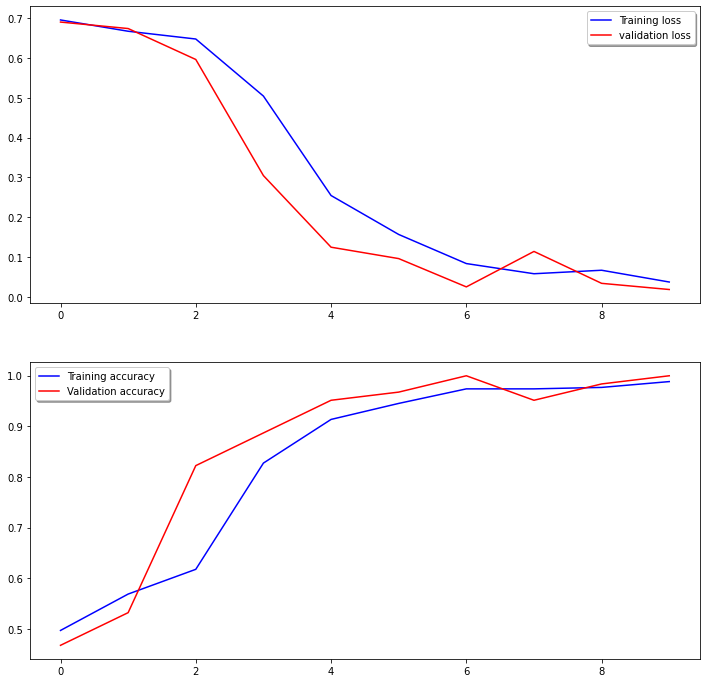

In [8]:
# plot the loss and accuracy curves for training and validation
fig , ax = plt.subplots(2,1, figsize=(12, 12))
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model.history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [9]:
# score
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])


Test loss: 0.01835985668003559
Test accuracy: 1.0
Train loss: 0.021095409989356995
Train accuracy: 0.9913793206214905


2/2 [==============================] - 0s 21ms/step


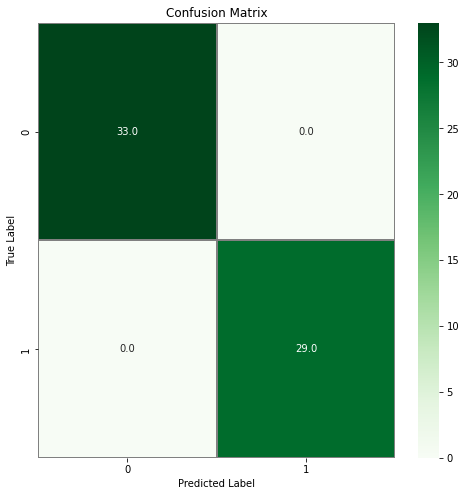

In [10]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.round(Y_pred)
Y_true = Y_test
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [11]:

from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [13]:

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(layers.Embedding(input_dim=1000, output_dim=64, input_length=10))
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (64, 64, 1), activation=['linear', 'linear'])